Suppose you are working in Finance Department at a Corporate employer who believes in cost cutting due to inflation and economic slowdown. You are tasked to figure out what is the ideal salary for the future-hires in which company can still ensure employee motivation and also not overpay.

# Task
--- Create a ML model using Linear Regression. Predict the salary based on years of work experience

---

Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display


Load and Explore Dataset

In [2]:
# Loading the dataset
file_path = '/content/years_experience_salary_data.csv'  # Updated file path
df = pd.read_csv(file_path)




In [3]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Years Experience        Salary
0          8.923418  68457.238592
1         14.686165  96676.237190
2          1.002173  20671.719051
3          6.744319  53391.391139
4          3.788362  29676.255422


In [4]:
# Checking for null values
print("\nNull values in each column:")
print(df.isnull().sum())




Null values in each column:
Years Experience    0
Salary              0
dtype: int64


In [5]:
# Descriptive statistics of the dataset
print("\nDescriptive statistics of the dataset:")
print(df.describe())



Descriptive statistics of the dataset:
       Years Experience         Salary
count        500.000000     500.000000
mean          10.657265   78685.336424
std            5.639715   30318.538820
min            1.002173   13040.880280
25%            5.738532   53805.984234
50%           11.134777   81239.241692
75%           15.577146  102400.642909
max           19.949134  142565.548669


**Exploratory Data Analysis (EDA):**


EDA helps verify the appropriateness of using a linear regression model by identifying patterns and relationships in the data.

It also shows their linear relationship using scatter plots and correlation analysis.



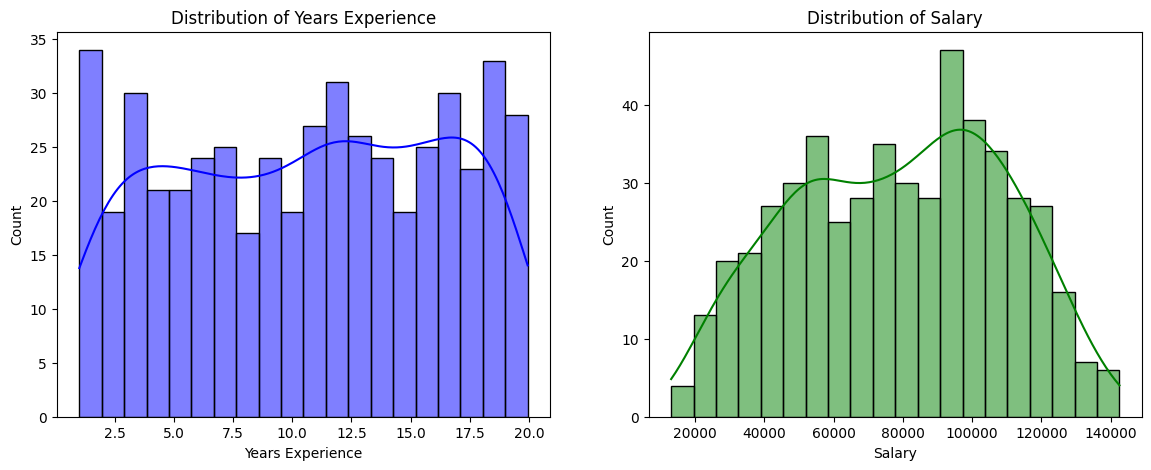

In [6]:
# Visualizing the data distribution
plt.figure(figsize=(14, 5))

# Distribution plot for 'Years Experience'
plt.subplot(1, 2, 1)
sns.histplot(df['Years Experience'], kde=True, bins=20, color='blue')
plt.title('Distribution of Years Experience')

# Distribution plot for 'Salary'
plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], kde=True, bins=20, color='green')
plt.title('Distribution of Salary')

plt.show()


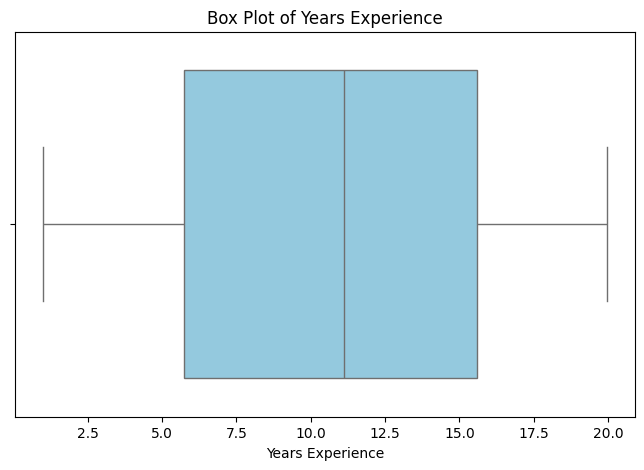

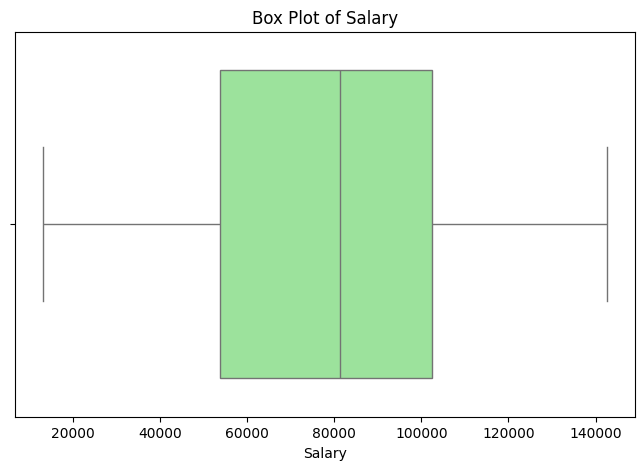

In [7]:
# Box plot for 'Years Experience'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Years Experience', color='skyblue')
plt.title('Box Plot of Years Experience')
plt.show()

# Box plot for 'Salary'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Salary', color='lightgreen')
plt.title('Box Plot of Salary')
plt.show()


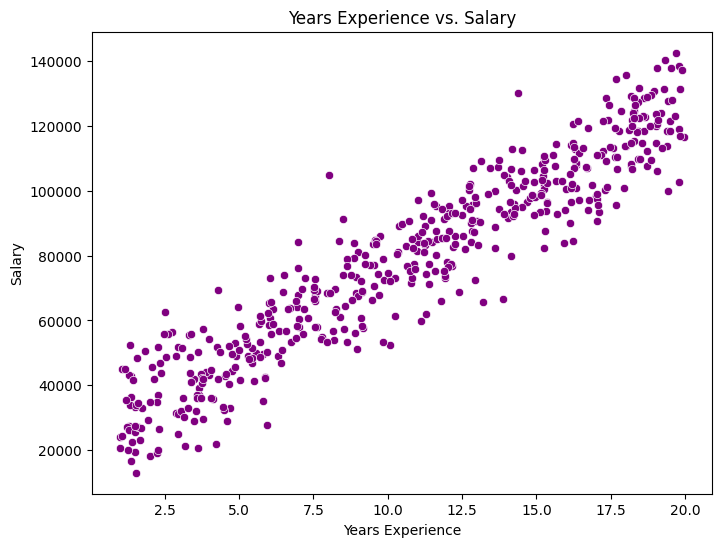

In [8]:

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years Experience', y='Salary', data=df, color='purple')
plt.title('Years Experience vs. Salary')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()




Correlation matrix:
                  Years Experience    Salary
Years Experience          1.000000  0.944266
Salary                    0.944266  1.000000


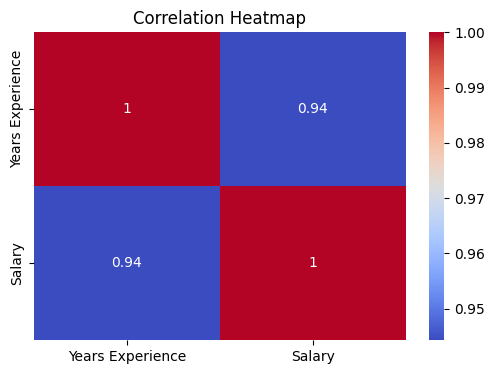

In [9]:
# Correlation between features
correlation = df.corr()
print("\nCorrelation matrix:")
print(correlation)

# Heatmap for correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


If the correlation coefficient between "Years Experience" and "Salary" is close to 1, it suggests a strong positive linear relationship, implying that as "Years Experience" increases, "Salary" tends to increase proportionally.



A high correlation coefficient indicates that a linear model is appropriate, while a lower correlation suggests that a linear relationship may not fully capture the dynamics between the variables.





**Model Building and Training:**

The chunk below splits the dataset into training and testing sets, builds a linear regression model, trains it on the training data, and makes predictions on the test set.


In [10]:
# Splitting the data into training and testing sets
X = df[['Years Experience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [11]:
# Creating the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)


In [12]:

# Evaluating the model using R-squared and RMSE
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")


R-squared: 0.8911210211480277


This value indicates that approximately 89.11% of the variance in the dependent variable ("Salary") can be explained by the independent variable ("Years Experience") using this linear regression model.


In simpler terms: "Years Experience" is a strong predictor of "Salary" in your dataset, as the model explains a large portion of the variability in salary.




**Residual Analysis to check for**

Linearity: Relationship between predictors and response is linear.

Independence: Residuals are independent.

Homoscedasticity: Residuals have constant variance.

Normality: Residuals are normally distributed.


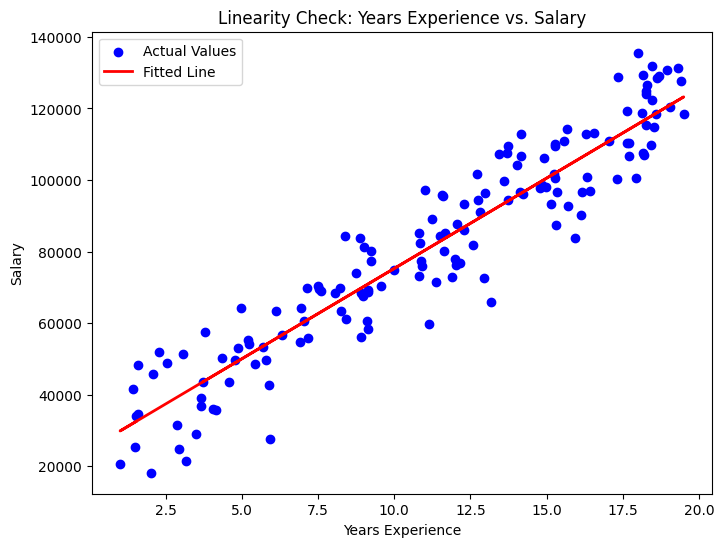

In [13]:
# Scatter plot to check linearity
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.title('Linearity Check: Years Experience vs. Salary')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


Interpretation: If the scatter plot shows a roughly linear relationship between the independent variable ("Years Experience") and the dependent variable ("Salary") with points closely scattered around the fitted line (red), the linearity assumption is satisfied.


In [14]:
 #Calculate residuals
residuals = y_test - y_pred

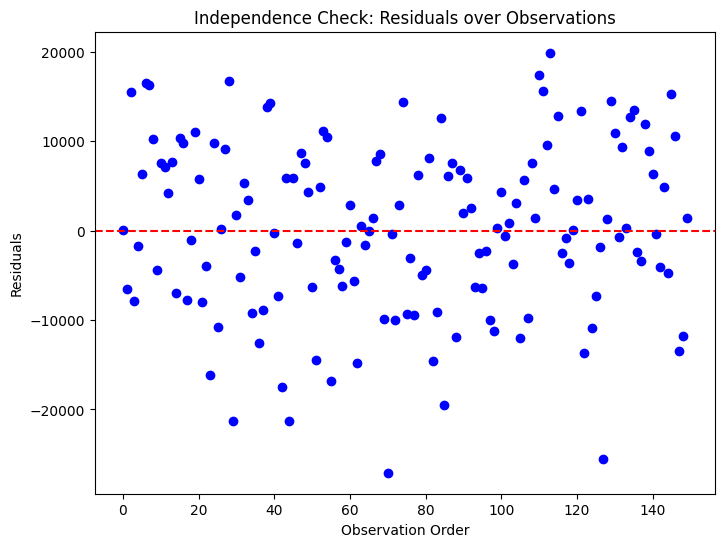

In [15]:
# Calculate residuals
residuals = y_test - y_pred
# Plot residuals over the order of observations to check independence
plt.figure(figsize=(8, 6))
plt.plot(range(len(residuals)), residuals, marker='o', linestyle='', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Independence Check: Residuals over Observations')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.show()


Interpretation: If the plot shows no clear pattern or structure (random scatter), the independence assumption is likely met. Non-random patterns (e.g., trends or cycles) suggest a violation of independence.


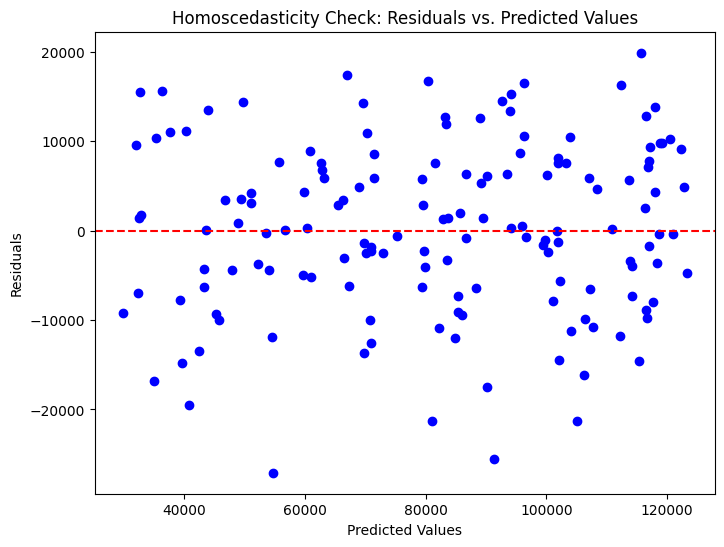

In [16]:
# Plot residuals vs. fitted values to check homoscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Interpretation: If the residuals are randomly scattered around the horizontal axis (y=0) with a consistent spread, the homoscedasticity assumption is satisfied.

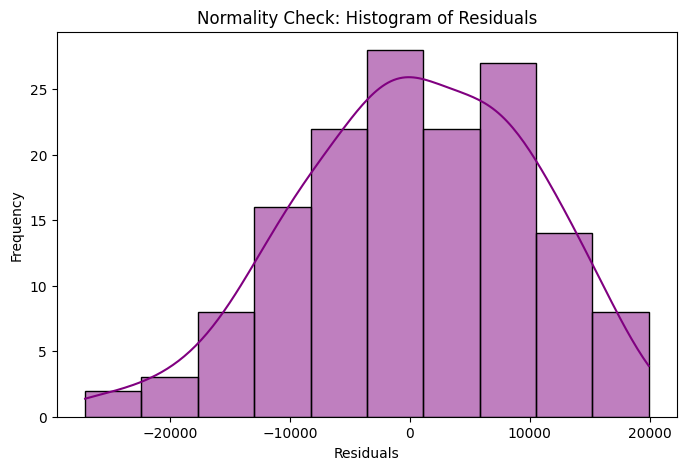

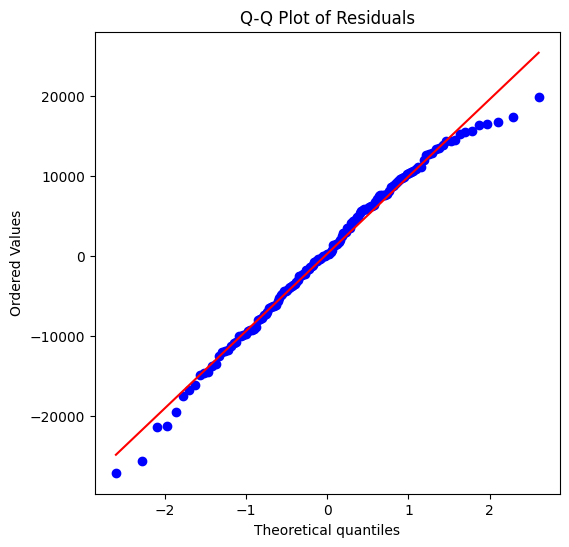

In [17]:
# Histogram of residuals to check normality
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Normality Check: Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot to further check for normality
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()


Interpretation:

Histogram: If the residuals follow a bell-shaped curve, it suggests they are normally distributed.

Q-Q Plot: If the points lie approximately along the straight line, it indicates that the residuals are normally distributed.

A random scatter around the horizontal line (y = 0) indicates that the linear regression model is appropriate and that the relationship between "Years Experience" and "Salary" is linear.


Meeting all four assumptions (linearity, independence, homoscedasticity, and normality of residuals) ensures the linear regression model provides unbiased and reliable estimates.


If the assumptions are not met, the model may give biased predictions, leading to inaccurate results and incorrect conclusions. In such cases, alternative modeling techniques or data transformations should be considered.

Cross-Validation

In [18]:
# Performing k-fold cross-validation to evaluate model generalizability
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Using R-squared as the scoring metric
print(f"Cross-Validation R-squared scores: {cv_scores}")
print(f"Mean Cross-Validation R-squared: {cv_scores.mean()}")


Cross-Validation R-squared scores: [0.88108588 0.89751305 0.87829744 0.88584035 0.9064089 ]
Mean Cross-Validation R-squared: 0.8898291226767435


This chunk performs 5-fold cross-validation to evaluate the model's generalizability. It splits the dataset into 5 parts and trains/tests the model on these subsets to get multiple R-squared scores.


The mean cross-validation R-squared value indicates how well the model is likely to perform on unseen data, with values close to the initial R-squared indicating a stable and reliable model.


5-fold cross-validation means the dataset is divided into 5 parts, with the model being trained on 4 parts and tested on 1 part in each iteration.



In [19]:
# Interactive Prediction Code
def interactive_prediction(years_exp):
    # Predicting salary for given years of experience
    predicted_salary = model.predict(np.array(years_exp).reshape(-1, 1))[0]
    print(f"For {years_exp} years of experience, the predicted salary is: ${predicted_salary:.2f}")

# Creating an interactive widget
years_exp_widget = widgets.FloatSlider(value=5.0, min=1.0, max=30.0, step=0.1, description='Years Exp:')
interactive_predict_button = widgets.interactive(interactive_prediction, years_exp=years_exp_widget)

print("\nInteractive Salary Prediction:")
display(interactive_predict_button)



Interactive Salary Prediction:


interactive(children=(FloatSlider(value=5.0, description='Years Exp:', max=30.0, min=1.0), Output()), _dom_cla…

**Data**

What is the average number of years of experience?

Answer: **The average number of years of experience is 10.66 years as per the working below.**


What is the standard deviation of salaries?

Answer: **The standard deviation of salaries is $30318.54 as per the working below.**

What does the minimum and maximum salary suggest about the data?

Answer: **The minimum and maximum salary suggest that there is a wide range of salaries in the data set which could point at potential outliers. Moreover, there is evidence that because the range of salary is too high it could be due to people with different domains, qualifications and skillsets.**

In [20]:
# Calculate the average years of experience
average_experience = df["Years Experience"].mean()

print(f"Average Years of Experience: {average_experience:.2f}")

Average Years of Experience: 10.66


In [21]:
# Calculate the standard deviation of salaries
salary_std = df["Salary"].std()

print(f"Standard Deviation of Salaries: {salary_std:.2f}")

Standard Deviation of Salaries: 30318.54


In [22]:
min_salary = df["Salary"].min()
max_salary = df["Salary"].max()

print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")


Minimum Salary: 13040.880279687735
Maximum Salary: 142565.54866867315


# Questions


1. How can we interpret the coefficient of "years of experience"? What does a positive coefficient indicate?


2. Why is it important to check the distribution of salary and years of experience before applying regression?

3. What happens if we use all the data for training and none for testing? How does it impact model evaluation?

4. What does it mean if the model's predicted salaries are consistently lower or higher than actual salaries?

5. How does increasing or decreasing the training dataset size affect model performance?

6. If another variable, such as "certifications," is added to the dataset, how might it impact the regression results?

7. If the dataset contained outliers (e.g., a person with 50 years of experience but a very low salary), how would that affect the model?

8. If the dataset only contains a small number of observations, what problems might arise when training the model?

9. How does the LinearRegression().fit() function work in training the model?

10. If the dataset had outliers (e.g., a CEO with 40 years of experience earning $1M), how would that affect the model?

11. If the company wanted to predict salary for interns (0 years experience), would this model still be reliable? Why or why not?



1.   Question 1 Answer :

The coeffecient of years of experience shows us the exact amount by which the salary will increase for a given year(s) of experience. In this case the coeffecient of years of experience is 5044.76. Since it is positive, it means that the salary increases by $5044.76 for every unit increase in years of experience.




In [23]:
# Print all coefficients
coefficients = model.coef_
print(f"Coefficients: {coefficients}")

# Print the intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")

Coefficients: [5044.76561066]
Intercept: 24836.27778369729




2.   Question 2 Answer :

Checking the distribution helps identify skewness, outliers, and the relationship between variables. This ensures that the assumptions of linear regression (linearity, normality, homoscedasticity) are met, leading to more reliable results.



3. Question 3 Answer:

We can see that the R^2 of the data with 100% being used for train is higher than that of the split data but we can not make any comments on the performance of the mocdel on unseen data. This is because being trained on a single piece of data leads to overfitting.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
X = df[['Years Experience']]
y = df['Salary']

# Scenario 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model_split = LinearRegression().fit(X_train, y_train)

# Evaluate on the training set
train_score_split = model_split.score(X_train, y_train)

# Evaluate on the testing set
test_score_split = model_split.score(X_test, y_test)

print("Train-Test Split Scenario:")
print(f"Training R²: {train_score_split}")
print(f"Testing R²: {test_score_split}")
print()

# Scenario 2: Use All Data for Training
model_all = LinearRegression().fit(X, y)

# Evaluate on the entire dataset
train_score_all = model_all.score(X, y)

print("All Data for Training Scenario:")
print(f"Training R² (using all data): {train_score_all}")

Train-Test Split Scenario:
Training R²: 0.8904357718490602
Testing R²: 0.8958649764604112

All Data for Training Scenario:
Training R² (using all data): 0.8916383204458667


4. Question 4 Answer:

 This suggests that the model has a systematic bias. Possible reasons include missing important predictor variables, using an incorrect functional form (e.g., assuming a linear relationship when the true relationship is non-linear), or overfitting. Lower prediction leads to underfitting while higher prediction leads to overfitting.

5. Question 5 Answer:

- Increasing the dataset size generally improves model performance by making it more generalizable.

- Decreasing the dataset size can lead to overfitting, where the model captures noise instead of actual patterns.

6. Question 6 Answer:

If certifications significantly influence salaries, adding them as a feature should improve the model. It could help explain salary variations that experience alone cannot.

7. Question 7 Answer:

Such outliers could distort the model by pulling the regression line away from the general trend, reducing its predictive accuracy. Robust regression techniques or outlier handling methods like winsorization may be needed.

8. Question 8 Answer:

*   Higher variance in model estimates
*   Less reliable coefficient estimates
*   Greater risk of overfitting


9. Question 9 Answer:

The function calculates the best-fit line by minimizing the sum of squared errors between actual and predicted salaries. It determines the optimal coefficients using Ordinary Least Squares (OLS).

10. Question 10 Answer:

High outliers can skew the regression line, leading to an overestimation of salaries for lower-experience employees.

The Line of best fit would move above.

 This issue can be mitigated using transformations like log-salaries or robust regression.

11. Question 11 Answer:

The model may not be reliable because it is trained on data where all employees have some experience. Extrapolating to zero years may produce inaccurate predictions if the relationship between experience and salary changes at the lower end. To resolve this a salary pool of interns should be used as they have no experience, the y intercept of experienced people is not reliable method.